<a href="https://colab.research.google.com/github/AshwinCarvalho999/EDA-on-Hotel-Booking-analysis-project/blob/main/CAPSTONE_PROJECT_1_EDA_Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
#importing all the required library.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
#importing Hotelbooking csv file from drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Giving path of Hotelbooking csv file from drive to colab notebook.
df = pd.read_csv("/content/drive/MyDrive/Hotel Bookings.csv")

In [ ]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
#size of data set.
df.shape

(119390, 32)

In [ ]:
#index of data set.
df.index

RangeIndex(start=0, stop=119390, step=1)

In [ ]:
#getting the list of columns from database to see what type of colums are there in database.
list(df.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

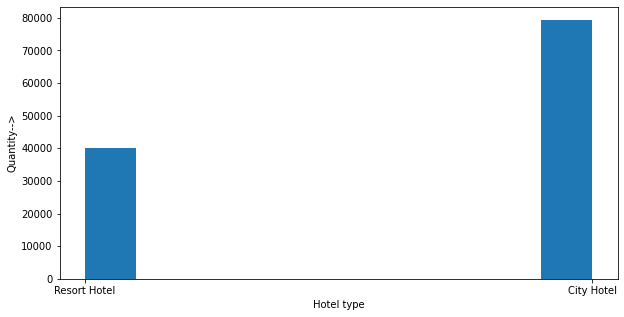

In [ ]:
#ploting a Histogram for understanding no of bookings for various types of hotels.
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(df['hotel'])
ax.set_xlabel('Hotel type')
ax.set_ylabel('Quantity-->')
plt.show()


In [ ]:
#Useing datatype command for understanding the datatype of every columns in data set
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

DATA CLEANING AND PREPARATION

In [ ]:
#Removing unnecessary data or columns from database.
df = df.drop(columns=['arrival_date_year','agent','company','reservation_status_date'])
df.shape
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out
1,Resort Hotel,0,737,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out
2,Resort Hotel,0,7,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out
3,Resort Hotel,0,13,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out
4,Resort Hotel,0,14,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out


In [ ]:
#checking for a row if it contain any duplicate data.
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows:" ,duplicate_rows_df.shape) 

number of duplicate rows: (32267, 28)


In [ ]:
df.count()

hotel                             119390
is_canceled                       119390
lead_time                         119390
arrival_date_month                119390
arrival_date_week_number          119390
arrival_date_day_of_month         119390
stays_in_weekend_nights           119390
stays_in_week_nights              119390
adults                            119390
children                          119386
babies                            119390
meal                              119390
country                           118902
market_segment                    119390
distribution_channel              119390
is_repeated_guest                 119390
previous_cancellations            119390
previous_bookings_not_canceled    119390
reserved_room_type                119390
assigned_room_type                119390
booking_changes                   119390
deposit_type                      119390
days_in_waiting_list              119390
customer_type                     119390
adr             

In [ ]:
#droping the duplicates
df.drop_duplicates()
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out
1,Resort Hotel,0,737,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out
2,Resort Hotel,0,7,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out
3,Resort Hotel,0,13,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out
4,Resort Hotel,0,14,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out


In [ ]:
df.count()

hotel                             119390
is_canceled                       119390
lead_time                         119390
arrival_date_month                119390
arrival_date_week_number          119390
arrival_date_day_of_month         119390
stays_in_weekend_nights           119390
stays_in_week_nights              119390
adults                            119390
children                          119386
babies                            119390
meal                              119390
country                           118902
market_segment                    119390
distribution_channel              119390
is_repeated_guest                 119390
previous_cancellations            119390
previous_bookings_not_canceled    119390
reserved_room_type                119390
assigned_room_type                119390
booking_changes                   119390
deposit_type                      119390
days_in_waiting_list              119390
customer_type                     119390
adr             

In [ ]:
#finding the nulls values using isnull function.
print(df.isnull().sum())

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car_parking_spaces         0
total_of_spe

In [ ]:
#droping missing or null values using dropna function.
df = df.dropna()  #this will drop the not avalable values.
df.count() 

hotel                             118898
is_canceled                       118898
lead_time                         118898
arrival_date_month                118898
arrival_date_week_number          118898
arrival_date_day_of_month         118898
stays_in_weekend_nights           118898
stays_in_week_nights              118898
adults                            118898
children                          118898
babies                            118898
meal                              118898
country                           118898
market_segment                    118898
distribution_channel              118898
is_repeated_guest                 118898
previous_cancellations            118898
previous_bookings_not_canceled    118898
reserved_room_type                118898
assigned_room_type                118898
booking_changes                   118898
deposit_type                      118898
days_in_waiting_list              118898
customer_type                     118898
adr             

In [ ]:
#checking for the null value again for conforming that there are no null values.
print(df.isnull().sum()) 

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [ ]:
#using describe function for understanding paterns and min mas values in data set.
df.describe()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


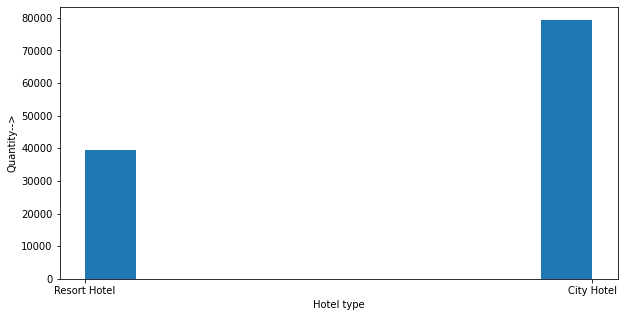

In [ ]:
#ploting a histogram to understand how many entries.
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(df['hotel'])
ax.set_xlabel('Hotel type')
ax.set_ylabel('Quantity-->')
plt.show()

<Figure size 1440x1080 with 0 Axes>

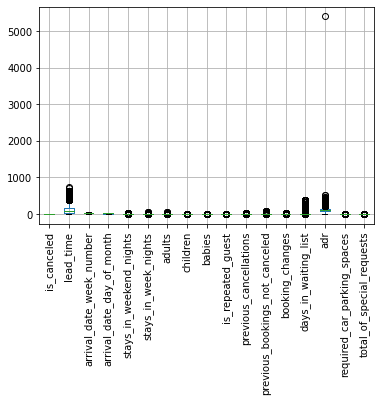

<Figure size 1440x1080 with 0 Axes>

In [ ]:
#making a box plot to check if there any outlier in data.
df.boxplot()
plt.xticks(rotation=90)
plt.figure(figsize=(20,15))

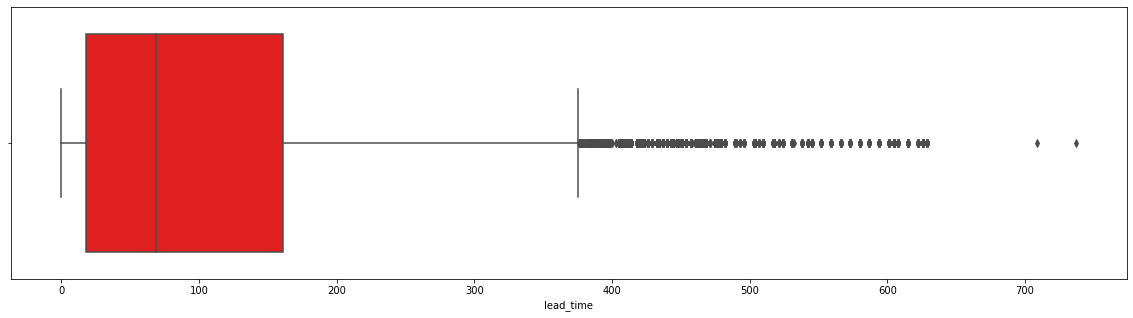

In [ ]:
#creating individual boxplot of lead_time varaible.
plt.figure(figsize=(20,5))
sns.boxplot(x=df['lead_time'],color='Red')


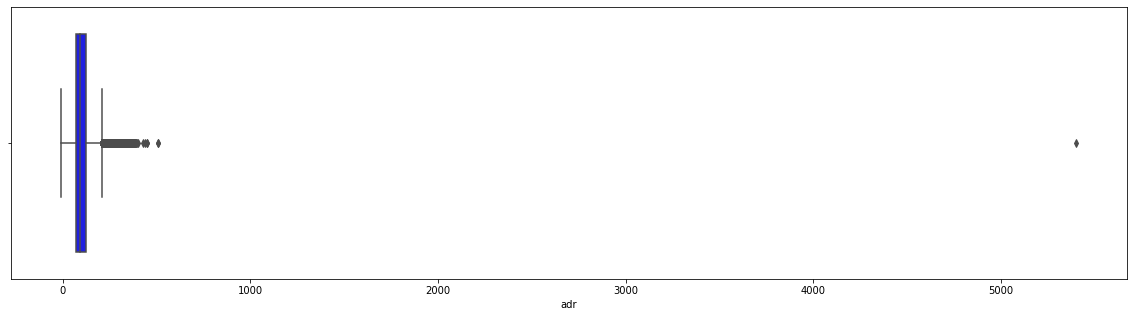

In [ ]:
#creating individual boxplot of adr that is address varaible.
plt.figure(figsize=(20,5))
sns.boxplot(x=df['adr'],color='Blue')

In [ ]:
#dropping outliers
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3 - q1
print("\nInterquartileRange=\n",IQR)
df1 = df[~((df<(q1 - 1.5 * IQR)) |(df> (q3 + 1.5 * IQR))).any(axis=1)]
df1.head(5)
df1.shape


InterquartileRange=
 is_canceled                         1.0
lead_time                         143.0
arrival_date_week_number           22.0
arrival_date_day_of_month          15.0
stays_in_weekend_nights             2.0
stays_in_week_nights                2.0
adults                              0.0
children                            0.0
babies                              0.0
is_repeated_guest                   0.0
previous_cancellations              0.0
previous_bookings_not_canceled      0.0
booking_changes                     0.0
days_in_waiting_list                0.0
adr                                56.0
required_car_parking_spaces         0.0
total_of_special_requests           1.0
dtype: float64


(55020, 28)

In [ ]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
days_in_waiting_list                int64
customer_type                     

DATA VISUALIZATION

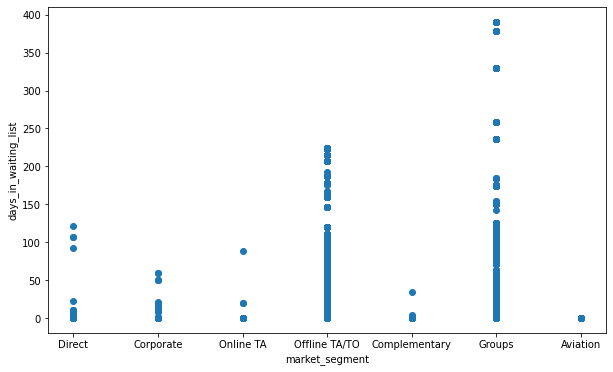

In [ ]:
#creating a subplots
fig, ax=plt.subplots(figsize=(10,6))
ax.scatter(df['market_segment'], df['days_in_waiting_list'])
ax.set_xlabel('market_segment')
ax.set_ylabel('days_in_waiting_list')
plt.show()

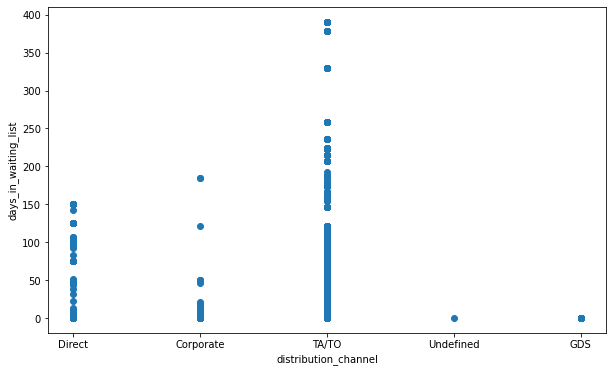

In [ ]:
#created subplot based on distribution channel
fig, ax=plt.subplots(figsize=(10,6))
ax.scatter(df['distribution_channel'], df['days_in_waiting_list'])
ax.set_xlabel('distribution_channel')
ax.set_ylabel('days_in_waiting_list')
plt.show()

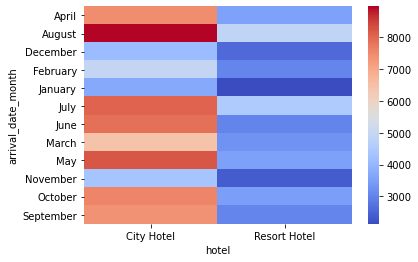

In [ ]:
#creating heatmap
sns.heatmap(pd.crosstab(df.arrival_date_month,df.hotel),cmap="coolwarm")

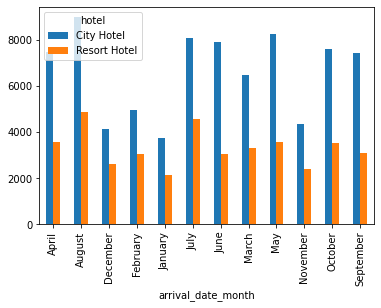

In [ ]:
#creating barploat
df = df.groupby(['arrival_date_month','hotel']).size()
df = df.unstack()
df.plot(kind='bar')

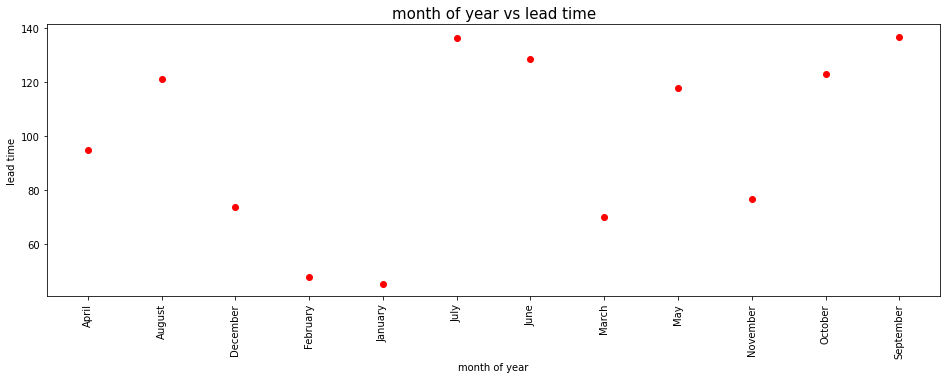

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(p, 'ro',color='r')
plt.xticks(rotation=90)
plt.title('month of year vs lead time',fontsize=15)
plt.xlabel('month of year')
plt.ylabel('lead time')
plt.show()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.291994,0.007465,-0.006127,-0.002631,0.024110,0.058381,0.004751,-0.032521,-0.085179,0.109922,-0.055493,-0.144659,0.054016,0.046199,-0.194796,-0.235643
lead_time,0.291994,1.000000,0.126738,0.002320,0.083984,0.164783,0.116799,-0.038335,-0.021149,-0.125091,0.085961,-0.071128,0.000004,0.170007,-0.066381,-0.115561,-0.096536
arrival_date_week_number,0.007465,0.126738,1.000000,0.066839,0.017642,0.015007,0.025394,0.005494,0.010039,-0.030411,0.035367,-0.020768,0.005187,0.022993,0.075277,0.001717,0.025778
arrival_date_day_of_month,-0.006127,0.002320,0.066839,1.000000,-0.015920,-0.027608,-0.001837,0.014562,-0.000539,-0.006340,-0.027013,0.000118,0.010767,0.022737,0.029923,0.008262,0.003082
stays_in_weekend_nights,-0.002631,0.083984,0.017642,-0.015920,1.000000,0.494888,0.090410,0.045430,0.018396,-0.087836,-0.013008,-0.040597,0.062401,-0.054568,0.047300,-0.018147,0.071669
stays_in_week_nights,0.024110,0.164783,0.015007,-0.027608,0.494888,1.000000,0.091999,0.044259,0.020157,-0.097994,-0.014274,-0.047367,0.095665,-0.002161,0.063628,-0.024378,0.066785
adults,0.058381,0.116799,0.025394,-0.001837,0.090410,0.091999,1.000000,0.029590,0.017887,-0.147494,-0.006974,-0.105028,-0.052420,-0.008765,0.227480,0.016370,0.121815
children,0.004751,-0.038335,0.005494,0.014562,0.045430,0.044259,0.029590,1.000000,0.024131,-0.032990,-0.024752,-0.020364,0.048660,-0.033396,0.325034,0.057060,0.081786
babies,-0.032521,-0.021149,0.010039,-0.000539,0.018396,0.020157,0.017887,0.024131,1.000000,-0.008954,-0.007489,-0.006306,0.083220,-0.010648,0.028591,0.036971,0.097601
is_repeated_guest,-0.085179,-0.125091,-0.030411,-0.006340,-0.087836,-0.097994,-0.147494,-0.032990,-0.008954,1.000000,0.082376,0.423259,0.012164,-0.022322,-0.135388,0.077776,0.013151


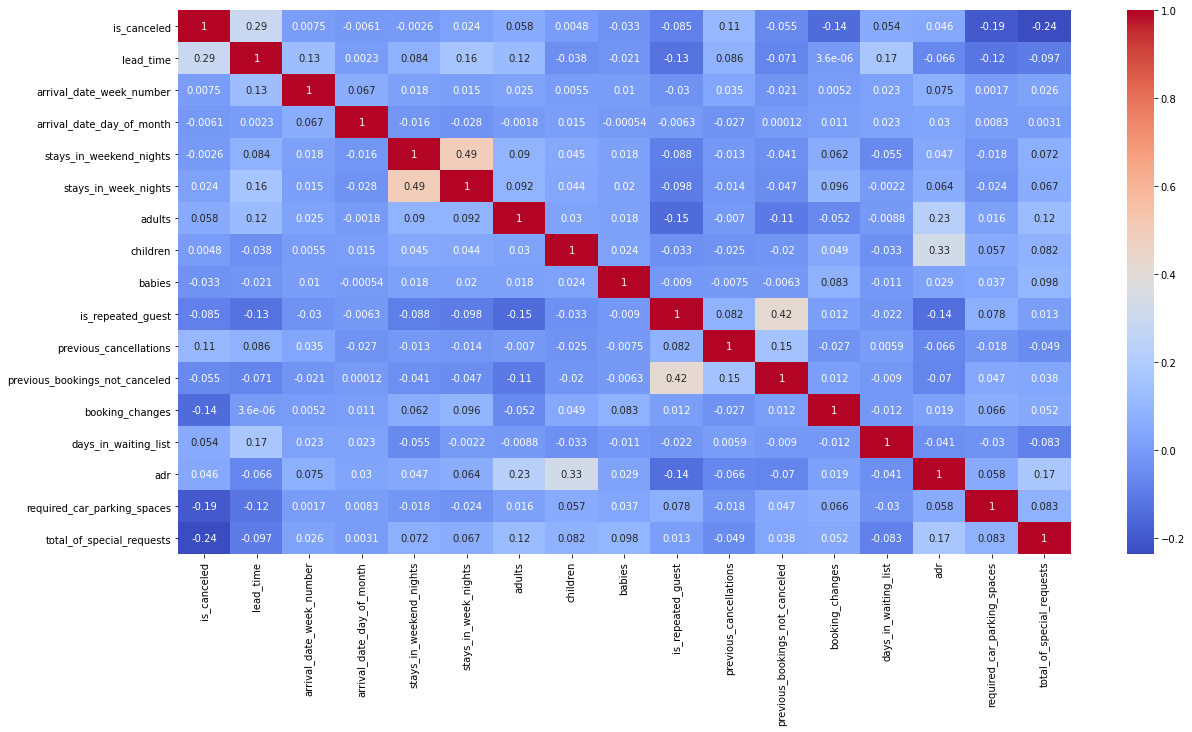

In [ ]:
plt.figure(figsize=(20,10))
c=df.corr()
sns.heatmap(c,cmap="coolwarm",annot=True)
c

In [ ]:
df.shape

(118898, 28)

In [ ]:
total_cancelations=df['is_canceled'].sum()
print(total_cancelations)
rh_canceltions=df.loc[df['hotel']=='Resort Hotel']['is_canceled'].sum()
print(rh_canceltions)
ch_canceltions=df.loc[df['hotel']=='City Hotel']['is_canceled'].sum()
print(ch_canceltions)

44153
11077
33076
